Loading the Packages & Configuration

In [2]:
import json
# import nltk
import string
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder 
# import torch
# import torch.nn as nn
from collections import defaultdict
import random
# from tqdm import tqdm 

Loading the Dataset

In [1050]:
ori_train_data = pd.read_csv('train.csv', header=None)
ori_test_data = pd.read_csv('test.csv', header=None)

print(ori_train_data.shape)
print(ori_test_data.shape)


(9388, 962)
(2959, 961)


In [1056]:
train_data = ori_train_data.drop([0, 961], axis = 1)
train_labels = ori_train_data[[961]]-1

In [1010]:
ori_train_data = np.array(ori_train_data)

train_data = ori_train_data[:,:-1]
train_labels = ori_train_data[:,-1]

In [809]:
# from pyod.models.abod import ABOD

In [810]:
# abod = ABOD(n_neighbors=10,contamination=0.01)
# abod.fit(train_data)

ABOD(contamination=0.01, method='fast', n_neighbors=10)

In [811]:
# scores = abod.decision_scores_
# th = abod.threshold_
# print(score)
# print(abod.threshold_)
# ol = []
# for i in range(len(scores)):
#     if scores[i] >= th:
#         ol.append(i)
# print(len(ol))

[-1.19258461e-15 -5.17231050e-14 -2.90290498e-14 ... -2.62514096e-13
 -9.07475293e-14 -2.86783786e-14]
-2.267650968246461e-17
94


In [1057]:
# train_data = np.array(train_data)
# train_labels = np.array(train_labels)
# print(train_data.shape)

(9388, 960)


In [813]:
# train_data = np.delete(train_data,ol,0)
# train_labels = np.delete(train_labels,ol,0)

In [814]:
train_data = pd.DataFrame(train_data)
train_labels = pd.DataFrame(train_labels)

In [1058]:
train_labels = np.array(train_labels).reshape(-1,)

In [1060]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=0)

In [1059]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
train_data,train_labels = sm.fit_resample(train_data,train_labels)

In [926]:
from collections import Counter
labels = []
for label in train_labels:
    labels.append(label)
print(Counter(labels))
labels = []
for label in test_l:
    labels.append(label)
print(Counter(labels))

Counter({2: 485, 8: 473, 5: 472, 1: 472, 7: 470, 9: 466, 4: 457, 6: 453, 0: 450, 3: 447, 16: 159, 12: 158, 15: 157, 18: 155, 13: 155, 19: 154, 14: 153, 17: 147, 10: 147, 11: 145, 20: 84, 28: 83, 21: 79, 24: 78, 26: 78, 25: 78, 23: 78, 22: 74, 27: 74, 29: 66, 37: 42, 34: 41, 36: 40, 33: 40, 39: 40, 31: 39, 35: 38, 38: 37, 30: 36, 32: 34, 46: 24, 41: 21, 45: 21, 44: 20, 47: 19, 40: 19, 43: 18, 42: 18, 48: 16})
Counter({0: 128, 3: 124, 4: 120, 6: 117, 8: 113, 9: 113, 7: 110, 5: 108, 1: 107, 2: 105, 11: 50, 17: 43, 10: 43, 19: 41, 18: 38, 12: 38, 15: 37, 14: 37, 13: 35, 16: 34, 29: 29, 22: 23, 27: 23, 26: 20, 25: 20, 23: 20, 21: 18, 24: 18, 32: 15, 28: 14, 20: 14, 30: 13, 38: 11, 36: 9, 39: 9, 31: 9, 35: 9, 48: 8, 33: 8, 37: 7, 34: 7, 42: 6, 43: 6, 40: 5, 47: 5, 41: 4, 44: 4, 45: 3})


In [826]:
split_1 = []
l_1 = []
split_2 = []
l_2 = []
for i in range(len(train_labels)):
    if train_labels[i] >= 20:
        split_2.append(train_data[i])
        l_2.append(train_labels[i])
    else:
        split_1.append(train_data[i])
        l_1.append(train_labels[i])
split_1 = np.array(split_1)
split_2 = np.array(split_2)
l_1 = np.array(l_1)
l_2 = np.array(l_2)

In [827]:
oversample = SMOTE()
undersample = imblearn.under_sampling.RandomUnderSampler()
train_data_2, train_labels_2 = oversample.fit_resample(split_2, l_2)
train_data_1, train_labels_1 = undersample.fit_resample(split_1,l_1)

In [829]:
print(train_data_2.shape)
train_data = np.append(train_data_1,train_data_2,axis=0)
train_labels = np.append(train_labels_1,train_labels_2,axis=0)

(2262, 960)


In [876]:
print(train_data.shape)

(23765, 960)


In [788]:
t = []
l = []
for i in range(49):
    for j in range(len(train_data)):
        if train_labels[j] == i:
            t.append(train_data[j])
            l.append(train_labels[j])

In [789]:
t = np.array(t)
l = np.array(l)
train_data = t
train_labels = l

In [790]:
print(train_data.shape)

(23471, 960)


In [577]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
strategy = {0:590,1:590, 2:590,3:590, 4:590, 5: 590, 
            6:590, 7:590,8:590, 9:590, 10: 200,
            11:200, 12:200,13:200, 14:200, 15: 200,
            16:200, 17:200,18:200, 19:200, 20: 100,
            21:100, 22:100,23:100, 24:100, 25: 100,
            26:100, 27:100,28:100, 29:100, 30: 100,
            31:100, 32:100,33:100, 34:100, 35: 100,
            36:100, 37:100,38:100, 39:100, 40: 100,
            41:100, 42:100,43:100, 44:100, 45: 100,
            46:100, 47:100,48:100}

strategy2 = {0:100,1:100, 2:100,3:100, 4:100, 5: 100, 
            6:100, 7:100,8:100, 9:100, 10: 100,
            11:100, 12:100,13:100, 14:100, 15: 100,
            16:100, 17:100,18:100, 19:100, 20: 100,
            21:100, 22:100,23:100, 24:100, 25: 100,
            26:100, 27:100,28:100, 29:100, 30: 100,
            31:100, 32:100,33:100, 34:100, 35: 100,
            36:100, 37:100,38:100, 39:100, 40: 100,
            41:100, 42:100,43:100, 44:100, 45: 100,
            46:100, 47:100,48:100}

oversample = SMOTE(sampling_strategy=strategy)
undersample = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=strategy2)
train_data, train_labels = oversample.fit_resample(train_data, train_labels)
train_data, train_labels = undersample.fit_resample(train_data, train_labels)
# comb = SMOTEENN(sampling_strategy=s)
# train_data,train_labels = comb.fit_resample(train_data,train_labels)


In [927]:
print(len(train_data))

7510


In [985]:
train_data = np.array(train_data).reshape(-1,960)
train_labels = np.array(train_labels).reshape(-1,)

In [763]:
train_data = np.array(train_data).reshape(28910,960)
train_labels = np.array(train_labels).reshape(28910,)

In [877]:
train_data = np.array(train_data).reshape(23765,960)
train_labels = np.array(train_labels).reshape(23765,)

In [764]:
import random

test_idx = []

for i in range(49):
    count = 0
    while count < 118:
        idx = random.randint(0,589)
        idx = i*590 + idx
        if idx not in test_idx:
            test_idx.append(idx)
            count += 1

train = []
train_l = []
test = []
test_l = []

for idx in test_idx:
    test.append(train_data[idx])
    test_l.append(train_labels[idx])

train = np.delete(train_data,test_idx,0)
train_l = np.delete(train_labels,test_idx,0)

In [196]:
train = []
train_l = []
test = []
test_l = []
for i in range(49):
    count = 0
    for j in range(28910):
        if train_labels[j] == i and count <472:
            train.append(train_data[j])
            train_l.append(train_labels[j])
            count += 1
        elif train_labels[j] == i and count >=472 and count <590:
            test.append(train_data[j])
            test_l.append(train_labels[j])
            count += 1
        if count >= 590:
            break

In [249]:
train = []
train_l = []
test = []
test_l = []
for i in range(49):
    count = 0
    for j in range(28910):
        if train_labels[j] == i and count <531:
            train.append(train_data[j])
            train_l.append(train_labels[j])
            count += 1
        elif train_labels[j] == i and count >=531 and count <590:
            test.append(train_data[j])
            test_l.append(train_labels[j])
            count += 1
        if count >= 590:
            break

In [124]:
train = []
train_l = []
test = []
test_l = []
for i in range(49):
    count = 0
    for j in range(9800):
        if train_labels[j] == i and count <160:
            train.append(train_data[j])
            train_l.append(train_labels[j])
            count += 1
        elif train_labels[j] == i and count >=160 and count <200:
            test.append(train_data[j])
            test_l.append(train_labels[j])
            count += 1
        if count >= 200:
            break

In [986]:
train = np.array(train_data)
test = np.array(test)
# test = np.array(dev_data)
train_l = np.array(train_labels)
test_l = np.array(test_l)
# test_l = np.array(dev_labels)
print(train.shape,test.shape)

(9877, 960) (2470, 960)


Data Inspection

接下来需要做的：
1. 数据归一化、标准化处理；（使用PCA降维之前先要进行标准化处理）
2. 数据降维；(不考虑特征的时间属性)
3. 样本类别不平衡；


方案2: ，然后使用MLP进行预测；

In [ ]:
# Counter(dev_labels)

In [987]:
print(train.shape,test.shape)
print(train_l.shape)

(9877, 960) (2470, 960)
(9877,)


接下来， 我们对数据进行归一化（标准化）处理。

In [908]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
train_nor_data = scalar.fit_transform(train)

print(train_nor_data.shape)

(9877, 960)


In [909]:
# train_nor_data = train_nor_data.reshape((-1, 16 ,60))

print(train_nor_data.shape)

(9877, 960)


In [910]:
test_nor_data = scalar.transform(test)
print(test_nor_data.shape)

(2470, 960)


In [988]:
train_shuffle = np.append(train,train_l.reshape(-1,1),axis=1)
print(train_shuffle.shape)
from sklearn.utils import shuffle
train_shuffle = shuffle(train_shuffle)

(9877, 961)


In [835]:
train_shuffle = np.append(train,train_l.reshape(5162,1),axis=1)
print(train_shuffle.shape)
from sklearn.utils import shuffle
train_shuffle = shuffle(train_shuffle)

(5162, 961)


In [879]:
train_shuffle = np.append(train,train_l.reshape(23765,1),axis=1)
print(train_shuffle.shape)
from sklearn.utils import shuffle
train_shuffle = shuffle(train_shuffle)

(23765, 961)


In [989]:
x_train = np.array(train_shuffle[:,:-1])
y_train = np.array(train_shuffle[:,-1])
x_test = np.array(test)
y_test = np.array(test_l)
print(x_train.shape,y_train.shape)
print(x_test.shape)

(9877, 960) (9877,)
(2470, 960)


In [133]:
print(test_l[0])
print(train_l)

0
[ 0  0  0 ... 48 48 48]


In [1065]:
x_train = x_train.reshape((-1,16,60))
x_test = x_test.reshape((-1,16,60))

In [768]:
x_train = x_train.reshape((28910,16,60))
x_test = x_test.reshape((5782,16,60))

In [962]:
x_train = x_train.reshape((7510,16,30))
x_test = x_test.reshape((1878,16,30))

In [737]:
x_train = x_train.reshape((7388,16,60))
x_test = x_test.reshape((2000,16,60))

In [960]:
joint = [0,1,2,6,7,8,12,13,14,18,19,20,24,25,26,30,31,32,36,37,38,42,43,44,48,49,50,54,55,56]

In [961]:
x_train = np.delete(x_train,joint,axis=2)
x_test = np.delete(x_test,joint,axis=2)

In [3]:
from tcn import TCN, tcn_full_summary
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tcn_layer = TCN(input_shape=(3, 60))
# The receptive field tells you how far the model can see in terms of timesteps.
# print('Receptive field size =', tcn_layer.receptive_field)

# hidden_size = 100

mlp = keras.Sequential(
    [
        layers.Input((16,60)),
#         layers.Dropout(0.1),

#         tcn_layer,
        layers.Conv1D(32,2,activation='relu',padding='valid',dilation_rate=1),
        layers.BatchNormalization(),
#         layers.Dropout(0.3),
        layers.Conv1D(32,2,activation='relu',padding='valid',dilation_rate=2),
        layers.BatchNormalization(),
#         layers.Dropout(0.3),
        layers.Conv1D(32,2,activation='relu',padding='valid',dilation_rate=4),
        layers.BatchNormalization(),
#         layers.Dropout(0.3),
        layers.Conv1D(32,2,activation='relu',padding='valid',dilation_rate=8),
#         layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
#         layers.Dropout(0.5),
        layers.Dense(64,activation='relu'),
#         layers.Dropout(0.25),
        layers.Dense(64,activation='relu'),
#         layers.Dropout(0.1),
        layers.Dense(49,activation='softmax')
    ]
)

In [4]:
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 15, 32)            3872      
_________________________________________________________________
batch_normalization_3 (Batch (None, 15, 32)            128       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 13, 32)            2080      
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 32)            128       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 9, 32)             2080      
_________________________________________________________________
batch_normalization_5 (Batch (None, 9, 32)             128       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1, 32)            

In [741]:
from tensorflow.keras.models import load_model
mlp = load_model("test4.h5")

In [1082]:
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [1036]:
train_data = train_data.reshape((-1,16,60))

In [1084]:
history_mlp = mlp.fit(x_train,y_train, epochs=1,batch_size=64,
                         validation_data=(x_test,y_test))

Train on 20237 samples, validate on 8673 samples
20237/20237 [==============================] - 2s 119us/sample - loss: 0.7697 - accuracy: 0.7717 - val_loss: 1.0610 - val_accuracy: 0.7334


In [1108]:
model1 = keras.Model(inputs=mlp.input,outputs=mlp.get_layer('conv1d_331').output)

In [1091]:
new_train = []
new_test = []
for i in range(len(x_train)):
    features = model.predict(x_train[i].reshape((1,16,60)))
    new_train.append(features)
for i in range(len(x_test)):
    features = model.predict(x_test[i].reshape(1,16,60))
    new_test.append(features)
new_train = np.array(new_train)
new_test = np.array(new_test)

In [1103]:
print(new_test.reshape(-1,32).shape)
print(new_train.reshape(-1,32).shape)

(8673, 32)
(20237, 32)


In [1116]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1000, gamma=0.001, decision_function_shape='ovr', probability=True)
model.fit(new_train.reshape(-1,32),y_train)


SVC(C=1000, gamma=0.001, probability=True)

In [1117]:
p = model.predict(new_test.reshape(-1,32))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,p))

0.7734347976478727


In [1096]:
print(x_test.reshape((-1,32)).shape)

(260190, 32)


KeyError: 'val_loss'

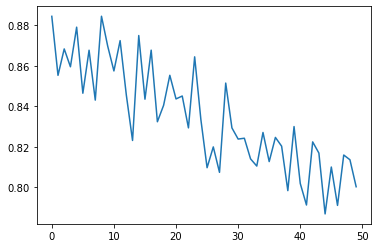

In [1043]:
import matplotlib.pyplot as plt

plt.plot(history_mlp.history['loss'], label='Train')
plt.plot(history_mlp.history['val_loss'], label='Test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and testing loss')
plt.legend()
plt.show()

KeyError: 'val_accuracy'

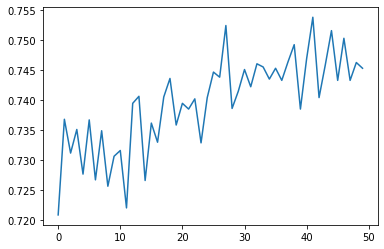

In [1044]:
plt.plot(history_mlp.history['accuracy'], label='Train')
plt.plot(history_mlp.history['val_accuracy'], label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and testing accuracy')
plt.legend()
plt.show()

In [779]:
mlp.save("new.h5")

In [77]:
np.savetxt("new_train.csv",x_train.reshape((23128,960)),delimiter=",")
np.savetxt("new_test.csv",x_test.reshape((5782,960)),delimiter=",")
np.savetxt("new_train_label.csv",y_train,delimiter=",")
np.savetxt("new_test_label.csv",y_test,delimiter=",")

In [78]:
np.savetxt("kaggle_test.csv",test,delimiter=",")

In [1118]:
test_data = open("test.csv",'r').readlines()

In [1119]:
test = []
test_id = []
for instance in test_data:
    sequence = instance.split(",")
    for i in range(len(sequence)):
        if i != 0:
            sequence[i] = float(sequence[i].strip())
        else:
            sequence[i] = int(sequence[i].strip())
    test.append(sequence[1:])
    test_id.append(sequence[0])
    
test = np.array(test)
teset_id = np.array(test_id)

In [1107]:
print(test.shape)

(2959, 960)


In [173]:
test = scalar.transform(test)

In [801]:
from tensorflow.keras.models import load_model

mlp = load_model("new.h5")

In [465]:
test = np.delete(test.reshape((2959,16,60)),joint,axis=2)

In [467]:
print(test.shape)

(2959, 16, 30)


In [1120]:
tf = []
for instance in test:
    instance = instance.reshape((1,16,60))
    tf.append(model1.predict(instance))
tf = np.array(tf)
predictions = model.predict(tf.reshape(-1,32))
prediction = np.array(predictions)
predictions += 1

In [1047]:
predictions = []
for instance in test:
    instance = instance.reshape((1,16,60))
    predictions.append(mlp.predict_classes(instance)[0] + 1)

In [1121]:
predict = ["Id,Category\n"]
for i in range(len(predictions)):
    predict += str(i) + "," + str(predictions[i]) + "\n"
test_predict = open("predictions.csv","w")
test_predict.writelines(predict)
test_predict.close()

In [1122]:
print(len(predictions))

2959
